In [4]:
# TCC da Pós-graduação Lato Sensu em Ciência de Dados e Big Data
## Entidade promotora: PUC Minas Virtual
### Trabalho de Conclusão de Curso apresentado ao Curso de Especialização em Ciência de Dados e Big Data como requisito parcial à obtenção do título de especialista.
### Projeto: Preditores de óbitos por COVID-19: O aprendizado de máquina como instrumento auxiliar na definição de políticas públicas

### Aluno: Breno Marques Barreto

# Considerações importantes sobre a utilização dos modelos salvos:
# Deve-se conferir se a versão do Python que irá utilizar é a mesma usada neste projeto.
# Aconselha-se utilizar para deserializar o modelo salvo:
#   1 - A mesma versão do Python. 
#   2 - As mesmas versãoes das bibliotecas usadas no projeto. 
# As orientações não são apenas para as versões da NumPy e da scikit-learn.

In [5]:
#Carga das funçoes criadas para o projeto
%run ./funcoes.ipynb

# Carga dos dados

In [6]:
geoses_df = load_df('nacional.csv',",",None,{'v0002_codigo_do_municipio':int, 'GeoSES':conv})  #carrega os dados da tabela auxiliar.

In [7]:
print('Núm. linhas e colunas:',geoses_df.shape) #exibe a quantidade de linhas e colunas do dataframe

Núm. linhas e colunas: (5565, 19)


In [8]:
geoses_df.head(3)

,v0002_codigo_do_municipio,GeoSES,PRIMEIRA__VAR,SEGUNDA__VAR,TERCEIRA__VAR,educação,mobilidade,pobreza,privacao_material,riqueza,renda,segregacao,educação__VAR,mobilidade__VAR,pobreza__VAR,privacao_material__VAR,riqueza__VAR,renda__VAR,segregacao__VAR
0,1200013,-0.626435,P_POBREZA,MED_RENDDOM,P_SO_CARRO,75.608520,0,65.207468,10.377063,0.000000,1097.845989,0.048161,P_SEM_INST,0,P_POBREZA,P_SO_CARRO,P_BANH4OUMAIS,MED_RENDDOM,ICE_renda_preto
1,1200054,-0.681931,P_POBREZA,MED_RENDDOM,P_SO_CARRO,72.888488,0,66.692311,7.297633,0.182434,1098.290113,0.042949,P_SEM_INST,0,P_POBREZA,P_SO_CARRO,P_BANH4OUMAIS,MED_RENDDOM,ICE_renda_preto
2,1200104,-0.610734,P_POBREZA,MED_RENDDOM,P_SO_CARRO,73.487393,0,62.651590,12.255028,0.205383,1236.792394,0.051404,P_SEM_INST,0,P_POBREZA,P_SO_CARRO,P_BANH4OUMAIS,MED_RENDDOM,ICE_renda_preto


In [9]:
# Total de registros do dataframe geoses_df  
contador_df = geoses_df['v0002_codigo_do_municipio'].value_counts()
contador_df.shape

(5565,)

In [10]:
# Variável com o nome do arquivo contendo os dados do SIVEP
arquivo_base = "INFLUD21-29-03-2021.csv"  

In [11]:
# Serão carregadas as variáveis com dados considerados preliminarmente relevantes 
colunas_relevantes = ['EVOLUCAO','HOSPITAL','UTI','SUPORT_VEN','NU_IDADE_N','CS_RACA','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO', 'DIARREIA','VOMITO','OUTRO_SIN','PUERPERA','CARDIOPATI','HEMATOLOGI','SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','OUT_MORBI','VACINA','CLASSI_FIN','PCR_SARS2','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','TOMO_RES','AN_SARS2','RES_IGM','RES_IGA','PCR_SARS2','TP_AM_SOR', 'CS_SEXO','CO_MUN_NOT','POS_AN_OUT','CO_MUN_NOT']

arquivo_base = "INFLUD21-29-03-2021.csv"
covid_df = load_df(arquivo_base,";",colunas_relevantes,None) #carrega os dados do arquivo csv.
print('Núm. linhas e colunas:',covid_df.shape) #exibe a quantidade de linhas e colunas do dataframe

Núm. linhas e colunas: (421368, 43)


In [12]:
# Exibe os primeiros registros do arquivo carregado
covid_df.head(3)

,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,POS_AN_OUT,AN_SARS2,TP_AM_SOR,RES_IGM,RES_IGA
0,350950,F,84,1,1.0,1.0,2.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN
1,354990,M,65,4,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,292740,F,46,9,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


# Processamento/Tratamento de dados

In [13]:
# Registros com 'CLASSI_FIN' vazio e 'RES_IGM' "positivo".
index_incoerencia1 = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['RES_IGM']==1.0)].index
covid_df.loc[index_incoerencia1,['CLASSI_FIN','RES_IGM']]

,CLASSI_FIN,RES_IGM
418,NaN,1.0
498,NaN,1.0
743,NaN,1.0
846,NaN,1.0
1914,NaN,1.0
...,...,...
420783,NaN,1.0
420971,NaN,1.0
420987,NaN,1.0
421125,NaN,1.0


In [14]:
# Registros com as colunas 'CLASSI_FIN' e 'EVOLUCAO' vazias.
incoerencia_df = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['EVOLUCAO'].isnull())].index
covid_df.loc[incoerencia_df,['CLASSI_FIN','EVOLUCAO']]   

,CLASSI_FIN,EVOLUCAO
4,NaN,NaN
10,NaN,NaN
11,NaN,NaN
20,NaN,NaN
27,NaN,NaN
...,...,...
421362,NaN,NaN
421363,NaN,NaN
421365,NaN,NaN
421366,NaN,NaN


In [15]:
# Total de registros como campo 'EVOLUCAO' não preenchido.
df_rows_missing_evolucao = covid_df[covid_df['EVOLUCAO'].isnull()]
df_rows_missing_evolucao.shape

(166418, 43)

In [16]:
    # Como a variável "EVOLUCAO" impacta diretamente na formação da variável alvo, decidiu-se apagar as linhas com "EVOLUCAO" não preenchido.
    df_rows_missing_evolucao = covid_df[covid_df['EVOLUCAO'].isnull()] # passo 1
    covid_df = covid_df.drop(df_rows_missing_evolucao.index, axis=0) # passo 2

In [17]:
    # Verificação de possíveis correções de classificações finais ausentes. 
    index_incoerencia1 = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['RES_IGM']==1.0)].index
    print("Quantidade de registros com 'CLASSI_FIN' vazio e 'RES_IGM' positivo",
     covid_df.loc[index_incoerencia1,'CLASSI_FIN'].shape)
    index_incoerencia2 = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['RES_IGA']==1.0)].index
    print("Quantidade de registros com 'CLASSI_FIN' vazio e 'RES_IGA' positivo",
     covid_df.loc[index_incoerencia2,'CLASSI_FIN'].shape)    
    index_incoerencia3 = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['PCR_SARS2']==1.0)].index
    print("Quantidade de registros com 'CLASSI_FIN' vazio e 'PCR_SARS2' positivo",
     covid_df.loc[index_incoerencia3,'CLASSI_FIN'].shape)
    index_incoerencia4 = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['AN_SARS2']==1.0)].index
    print("Quantidade de registros com 'CLASSI_FIN' vazio e 'AN_SARS2' positivo",
     covid_df.loc[index_incoerencia3,'CLASSI_FIN'].shape)

Quantidade de registros com 'CLASSI_FIN' vazio e 'RES_IGM' positivo (55,)
Quantidade de registros com 'CLASSI_FIN' vazio e 'RES_IGA' positivo (6,)
Quantidade de registros com 'CLASSI_FIN' vazio e 'PCR_SARS2' positivo (0,)
Quantidade de registros com 'CLASSI_FIN' vazio e 'AN_SARS2' positivo (0,)


In [18]:
    # Verificação dos registros com classificação final nula e evoluções preenchidas.
    incoerencia_df = covid_df[(covid_df['CLASSI_FIN'].isnull()) & (covid_df['EVOLUCAO']>0.0)]
    incoerencia_df['EVOLUCAO'].value_counts(dropna=False)

2.0    1744
1.0    1453
9.0     111
3.0      59
Name: EVOLUCAO, dtype: int64

In [19]:
condicao = [covid_df['CS_SEXO'] == 'F', covid_df['CS_SEXO'] == 'M', covid_df['CS_SEXO'] == 'I']
resultados = [covid_df['PUERPERA'], 2, 9]
# Se for mulher, mantém o valor do campo "PUERPERA", se homem atribui 2 ("NAO"),
# caso contrário, 9 ("IGNORADO").
# Se ainda houver NAN, será necessário tratar mulheres cujo estado não foi preenchido.
covid_df['PUERPERA'] = np.select(condicao, resultados, 9)

In [20]:
#Codificação da variável sexo
covid_df["CS_SEXO"] = coding(covid_df["CS_SEXO"], {'F':0,'M':1,'I':9}) 

In [21]:
covid_df.NU_IDADE_N [covid_df.NU_IDADE_N<0]

67016     -3
303122    -1
345213   -77
Name: NU_IDADE_N, dtype: int64

In [22]:
covid_df = corrige_idade(covid_df)

<ipython-input-5-1cd5fc9c8821>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df.NU_IDADE_N [covid_df.NU_IDADE_N<0] = covid_df.NU_IDADE_N.mean()


In [23]:
#Cria variável categórica baseada na idade
covid_df=cria_faixa_etaria(covid_df)

In [24]:
# Tratamento das demais variáveis categóricas (HOSPITAL, UTI, etc.) com valores nulos.
# Preenche com 9 ("Ignorado")     
colunas_preencher = ['HOSPITAL','UTI','FEBRE','TOSSE','GARGANTA','DISPNEIA',
'DESC_RESP','SATURACAO','DIARREIA','VOMITO', 'DOR_ABD','FADIGA','PERD_OLFT',
'PERD_PALA', 'OUTRO_SIN','CARDIOPATI','HEMATOLOGI','SIND_DOWN','HEPATICA',
'ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE',
'OUT_MORBI','VACINA','PCR_SARS2','POS_AN_OUT','SUPORT_VEN','TOMO_RES','AN_SARS2',
'CO_MUN_NOT', 'CS_SEXO','CLASSI_FIN','PUERPERA','CS_RACA', 'RES_IGM','RES_IGA','TP_AM_SOR']
print("Preenchidos:")
for cols in colunas_preencher:
    total_nulos = covid_df[(covid_df[cols].isnull())].shape[0]
    print("{} nulos de {} ".format(total_nulos, cols))
    covid_df[cols].fillna(9, inplace = True)

Preenchidos:
5438 nulos de HOSPITAL 
30662 nulos de UTI 
39857 nulos de FEBRE 
33191 nulos de TOSSE 
71079 nulos de GARGANTA 
28971 nulos de DISPNEIA 
43446 nulos de DESC_RESP 
37422 nulos de SATURACAO 
72318 nulos de DIARREIA 
74968 nulos de VOMITO 
78806 nulos de DOR_ABD 
69587 nulos de FADIGA 
76278 nulos de PERD_OLFT 
76541 nulos de PERD_PALA 
72145 nulos de OUTRO_SIN 
126249 nulos de CARDIOPATI 
154373 nulos de HEMATOLOGI 
154635 nulos de SIND_DOWN 
154540 nulos de HEPATICA 
152914 nulos de ASMA 
134801 nulos de DIABETES 
151935 nulos de NEUROLOGIC 
151996 nulos de PNEUMOPATI 
153395 nulos de IMUNODEPRE 
152847 nulos de RENAL 
149777 nulos de OBESIDADE 
135436 nulos de OUT_MORBI 
59869 nulos de VACINA 
135382 nulos de PCR_SARS2 
231171 nulos de POS_AN_OUT 
30240 nulos de SUPORT_VEN 
86646 nulos de TOMO_RES 
231844 nulos de AN_SARS2 
0 nulos de CO_MUN_NOT 
0 nulos de CS_SEXO 
3367 nulos de CLASSI_FIN 
68731 nulos de PUERPERA 
0 nulos de CS_RACA 
216674 nulos de RES_IGM 
229144 nulo

In [25]:
# Filtra apenas as colunas ainda relevantes
colunas_mantidas = ['EVOLUCAO','HOSPITAL','UTI','SUPORT_VEN','CS_RACA','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','OUTRO_SIN','PUERPERA','CARDIOPATI','HEMATOLOGI','SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','OUT_MORBI','VACINA','CLASSI_FIN','PCR_SARS2','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','TOMO_RES','AN_SARS2','CO_MUN_NOT', 'CS_SEXO', 'POS_AN_OUT','NU_IDADE_N','RES_IGM','RES_IGA','NU_IDADE_CAT'] 
covid_df = covid_df[colunas_mantidas]


In [26]:
#import sklearn.feature_selection.VarianceThreshold
# Eliminar as colunas com baixa variância
covid_df = elimina_baixa_variancia(covid_df) 

Num. variáveis inicial:43
Num. variáveis final:43


## União dos dataframes geoses_df e covid_df_var

In [27]:
covid_df = merge_dfs(geoses_df,covid_df) #une os dataframes pelo código do município.

Total de registros em geoses_df: 5565
<ipython-input-5-72610e129d67>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoses_df['CO_MUN_NOT'] = geoses_df['CO_MUN_NOT'].apply(lambda x: str(x)[:-1]).astype(int)


In [28]:
#Verifica a quantidade de campos não preenchidos/faltantes
k= pd.DataFrame()
k['covid_df'] = covid_df.isnull().sum()
k.T

,EVOLUCAO,HOSPITAL,UTI,SUPORT_VEN,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,PERD_PALA,TOMO_RES,AN_SARS2,CS_SEXO,POS_AN_OUT,NU_IDADE_N,RES_IGM,RES_IGA,NU_IDADE_CAT,GeoSES
covid_df,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Exibe as ocorrências de valores únicos em cada coluna
unicos(covid_df)

,EVOLUCAO,HOSPITAL,UTI,SUPORT_VEN,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,PERD_PALA,TOMO_RES,AN_SARS2,CS_SEXO,POS_AN_OUT,NU_IDADE_N,RES_IGM,RES_IGA,NU_IDADE_CAT,GeoSES
No de únicos,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Prim. valor unico,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Seg. valor unico,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [30]:
#Converte os tipos das variaveis do dataframe
#covid_df = converte_tipo_category(covid_df)

In [31]:
#Verifica os tipos das variáveis 
covid_df.dtypes

EVOLUCAO        float64
HOSPITAL        float64
UTI             float64
SUPORT_VEN      float64
CS_RACA           int64
FEBRE           float64
TOSSE           float64
GARGANTA        float64
DISPNEIA        float64
DESC_RESP       float64
SATURACAO       float64
DIARREIA        float64
VOMITO          float64
OUTRO_SIN       float64
PUERPERA        float64
CARDIOPATI      float64
HEMATOLOGI      float64
SIND_DOWN       float64
HEPATICA        float64
ASMA            float64
DIABETES        float64
NEUROLOGIC      float64
PNEUMOPATI      float64
IMUNODEPRE      float64
RENAL           float64
OBESIDADE       float64
OUT_MORBI       float64
VACINA          float64
CLASSI_FIN      float64
PCR_SARS2       float64
DOR_ABD         float64
FADIGA          float64
PERD_OLFT       float64
PERD_PALA       float64
TOMO_RES        float64
AN_SARS2        float64
CS_SEXO           int64
POS_AN_OUT      float64
NU_IDADE_N      float64
RES_IGM         float64
RES_IGA         float64
NU_IDADE_CAT    

## Definição da variável alvo.

In [32]:
covid_df = define_variavel_alvo(covid_df)  # define a variável alvo através da análise de outras colunas do dataframe.

Total de casos:  254948


0    175920
1     79028
Name: OBT_COVID, dtype: int64

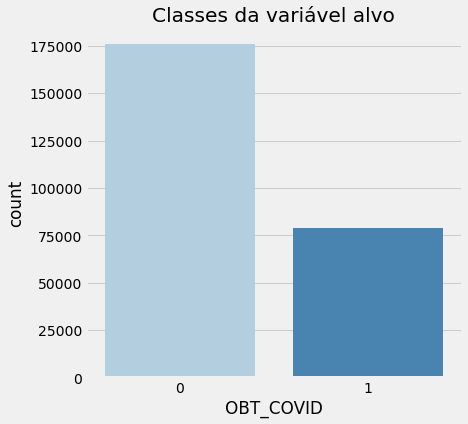

In [33]:
#Verifica o balanceamento das classes da variável alvo.
print("Total de casos: ",covid_df['OBT_COVID'].count()) 
plt.figure(figsize=(6,6))
sns.countplot(covid_df['OBT_COVID'],palette='Blues')
plt.title('Classes da variável alvo')
plt.xlabel('OBT_COVID')
covid_df['OBT_COVID'].value_counts()

# Salva versão antes da transformação em variáveis binárias
### Estes dados preprocessados serão usados para seleção de atributos, ajuste dos hiperparâmetros e construção dos modelos

In [34]:
ext_file0 = "_processed_pre_dummies.csv"
rad_filename = arquivo_base[:-4]  #exclui a extensão do arquivo
filename_pre_dummies = rad_filename + ext_file0
covid_df.to_csv(filename_pre_dummies,index = False,sep=';')